<a href="https://colab.research.google.com/github/4amtransients/landtnxtinternship/blob/master/main_fnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# libraries
import tensorflow as tf
  
import keras
from keras.datasets import mnist 
from keras.layers import Dense, Dropout
from keras.models import Sequential 

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from random import randint 

Using TensorFlow backend.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 30000 samples, validate on 30000 samples
Epoch 1/20
30000/30000 [==============================] - 1s 38us/step - loss: 1.3289 - accuracy: 0.6453 - val_loss: 0.8544 - val_accuracy: 0.8104
Epoch 2/20
30000/30000 [==============================] - 1s 36us/step - loss: 0.7011 - accuracy: 0.8383 - val_loss: 0.6071 - val_accuracy: 0.8581
Epoch 3/20
30000/30000 [==============================] - 1s 36us/step - loss: 0.5432 - accuracy: 0.8715 - val_loss: 0.5076 - val_accuracy: 0.8753
Epoch 4/20
30000/30

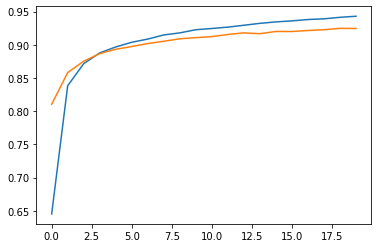

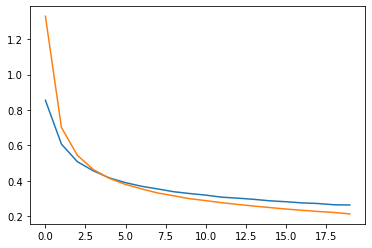

test loss: 0.237
test accuracy: 0.935
[[ 960    0    1    1    0    3    7    3    5    0]
 [   0 1116    4    2    0    1    3    1    8    0]
 [   7    1  945   14   10    1   10   18   23    3]
 [   2    1   17  936    0   22    3   11   13    5]
 [   1    1    4    0  927    0   12    3    4   30]
 [  14    2    7   34    8  780   14    5   22    6]
 [   9    3    9    1   10   10  910    2    4    0]
 [   2   10   21   10    8    0    0  947    2   28]
 [   4    8   14   34    7   13   13   13  859    9]
 [   9    7    1   17   32    4    1   15    4  919]]


precision [0.95238095 0.97127937 0.92375367 0.89227836 0.9251497  0.9352518
 0.9352518  0.9302554  0.90995763 0.919     ]


recall [0.97959184 0.98325991 0.91569767 0.92673267 0.94399185 0.87443946
 0.94989562 0.92120623 0.88193018 0.91080278]


Enter an index between 1 and 10000 to test the network for5678
8


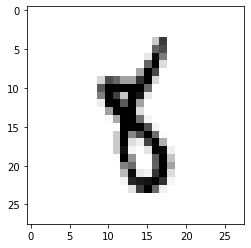

In [7]:
n=784
num_labels=10

#prepocessing data

(x_tr, label_tr), (x_te, label_te) = mnist.load_data() 

label_trlin=label_tr
label_telin=label_te

x_tr = x_tr.reshape(x_tr.shape[0], 784)
x_te = x_te.reshape(x_te.shape[0], 784)

data = x_tr
labels = label_tr
x_te2 = x_te

#categorical data
label_tr = keras.utils.to_categorical(label_tr, num_labels)
label_te = keras.utils.to_categorical(label_te, num_labels)

#creating model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(n,)))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

#fitting model
history=model.fit(x_tr, label_tr, batch_size=128, epochs=20, validation_split=.5)

#evaluation
loss, accuracy=model.evaluate(x_tr,label_tr)
print(accuracy,loss)
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

print(f'test loss: {loss:.3}')
print(f'test accuracy: {accuracy:.3}')

#prediction
results=model.predict(x_te)
df = pd.DataFrame(results)
resultslin=(df.idxmax(axis=1))

#confusion matrix
con_mat = tf.math.confusion_matrix(labels=label_telin, predictions=resultslin).numpy()
print(con_mat)
print('\n')

#precision and recall 

con = pd.DataFrame(con_mat)
predpos=con.sum(axis = 0, skipna = True)
predneg=con.sum(axis = 1, skipna = True)
precision=np.zeros(num_labels)
recall=np.zeros(num_labels)
for i in range(num_labels):
  precision[i]=con_mat[i,i]/(predpos[i])
  recall[i]=con_mat[i,i]/(predneg[i])
print('precision',precision)
print('\n')
print('recall',recall)

# inference

print('\n')
index = int(input('Enter an index between 1 and 10000 to test the network for'))
plt.imshow(x_te2[index].reshape(28,28),cmap='Greys')
print(resultslin[index])

    